In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import random
import seaborn as sns

In [258]:
x = np.array([random.uniform(-2,2) for i in range(0,50)])
x.sort()
y = np.tanh(x)
mean = []
std = []
a = []

In [259]:
def getfci(x,y,i):
    model = np.poly1d(np.polyfit(x,y,i))
    return model(x)

def functioni(x,y,i,parameter):
    l = []
    len0 = len(y)
    f = getfci(x,y,i)
    for i in range(0,len0):
        l.append(f[i]-y[i])
    a = np.array(l)
    a1 = np.absolute(a)
    if parameter == 0:
        return np.mean(a1)
    if parameter == 1:
        return np.std(a1)
    if parameter == 2:
        return a1

In [260]:
for i in range(0,5):
    mean.append(functioni(x,y,i,0)) 
    std.append(functioni(x,y,i,1)) 
    a.append(functioni(x,y,i,2))

In [261]:
mean,std

([0.6170021891978001,
  0.10842762357094726,
  0.10804108806236012,
  0.024502107649642894,
  0.024314944250513504],
 [0.3114004573064204,
  0.06116141304802785,
  0.05957200177169765,
  0.01324380685040375,
  0.013507742573924796])

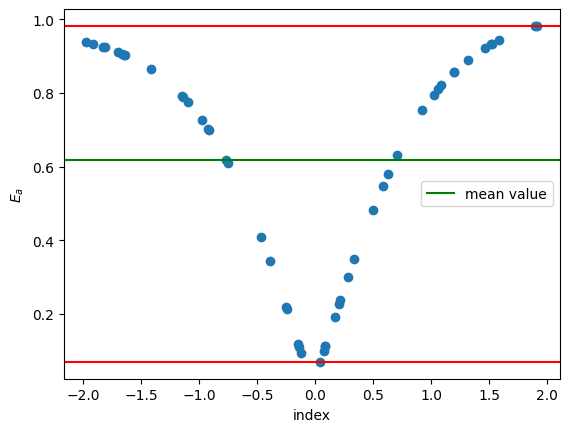

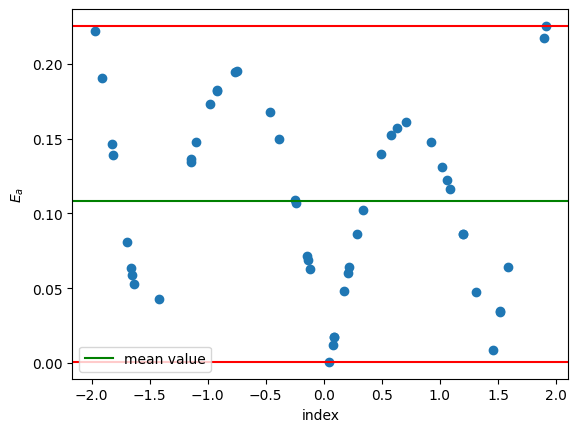

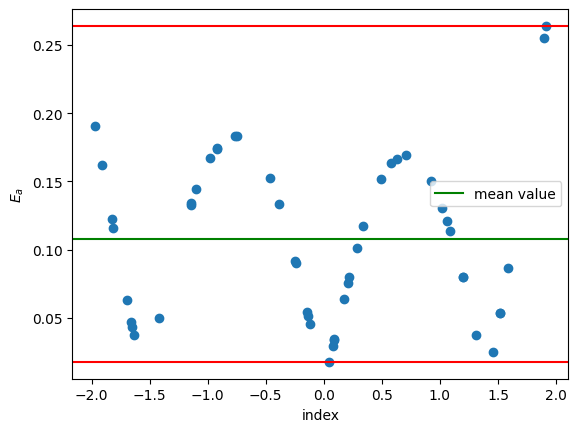

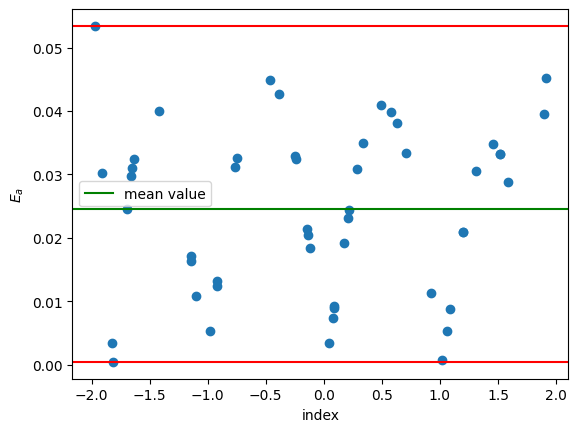

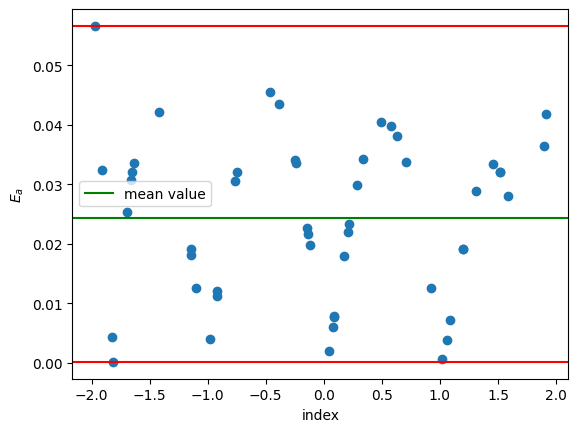

In [262]:
for i in range(0,5):
    plt.scatter(x,a[i])
    plt.axhline(max(a[i]),color='r')
    plt.axhline(min(a[i]),color='r')
    plt.axhline(mean[i],color='g',label = 'mean value')
    plt.ylabel('$E_{a}$')
    plt.xlabel('index')
    plt.legend()
    plt.show()

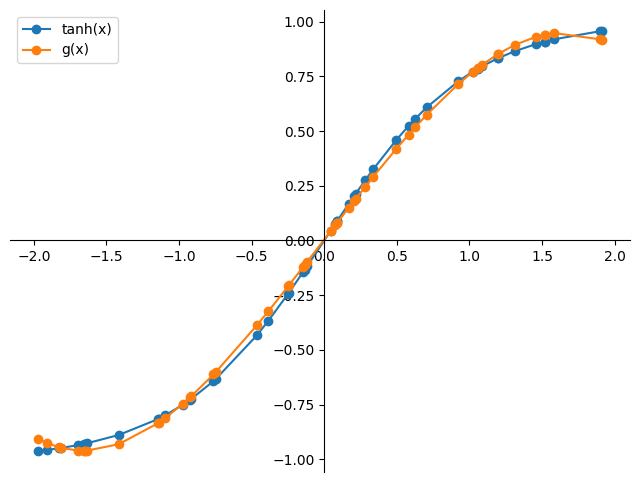

In [263]:
fig=plt.figure(figsize=(8,6))
ax=plt.gca()
g = getfci(x,y,4)

plt.plot(x,y,'-o',label = 'tanh(x)')
plt.plot(x,g,'-o',label = 'g(x)')
#去掉边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#指定x与y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#设置x与y轴的位置
ax.spines['bottom'].set_position(('data', 0))
#设置为居中显示:  'center' 代替 ('data', 0)

ax.spines['left'].set_position(('data', 0))#设置为(0,0)显示
plt.legend()
plt.show()

In [308]:
N = 100
mean100 = np.zeros((N,5))
std100 = np.zeros((N,5))

def test():
    for j in range(0,N):
        x = np.array([random.uniform(-2,2) for i in range(0,50)])
        x.sort()
        y = np.tanh(x)
        for i in range(0,5):
            mean100[j][i]=functioni(x,y,i,0)
            std100[j][i]=functioni(x,y,i,1)

In [309]:
test()

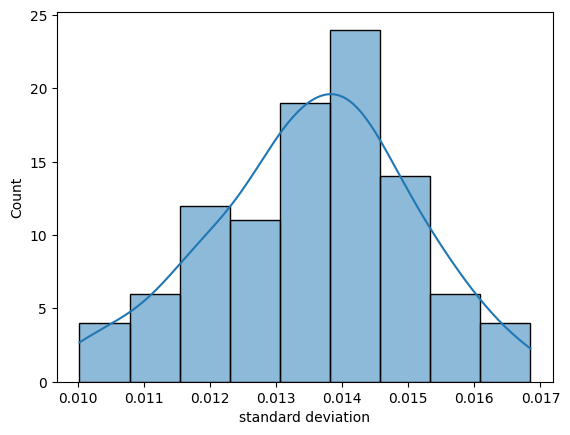

In [311]:
# sns.histplot(mean100[:,4],kde=True)
sns.histplot(std100[:,4],kde=True)
# plt.xlabel('mean')
plt.xlabel('standard deviation')
plt.ylabel('Count')
plt.show()